In [1]:
#importar bibliotecas
import math
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt
from datetime import datetime, timedelta 
!pip install yfinance
import yfinance as yf
yf.pdr_override()

In [2]:
#selecionar o período e o ticker a ser estudado
start = dt.datetime(2015,12,31)
end = dt.datetime.now()
btc = pdr.DataReader('BTC-USD', start, end)
btc.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,425.875000,432.920990,418.734985,430.566986,430.566986,45996600
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500


In [3]:
#verificar o numero de linhas e colunas para o estudo

btc.shape

(2471, 6)

Text(0, 0.5, 'Close Price USD($)')

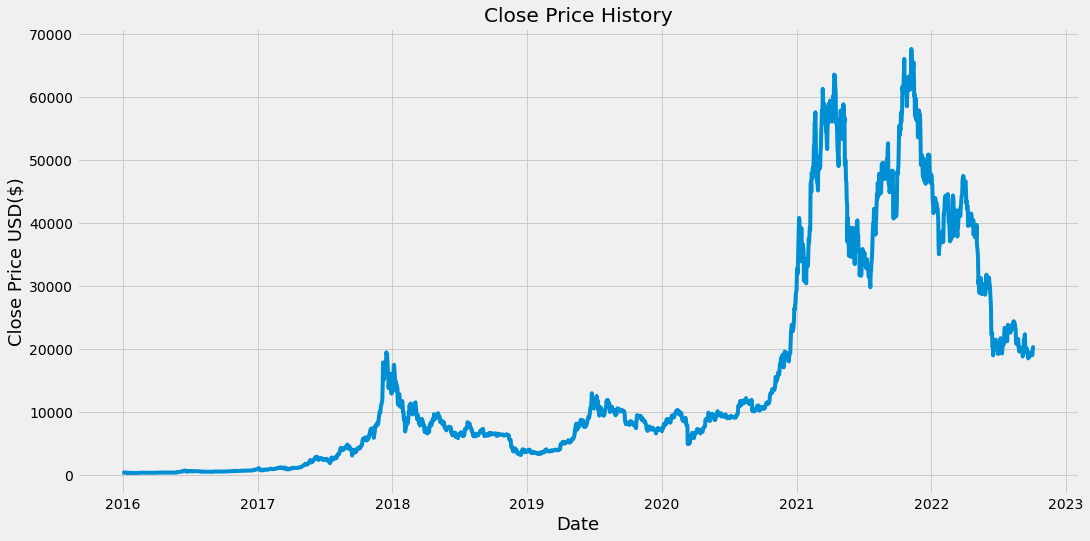

In [4]:
#visualizar o histórico do preço de fechamento em gráfico
plt.figure(figsize = (16,8))
plt.title ('Close Price History')
plt.plot (btc['Close'])
plt.xlabel ('Date', fontsize=18)
plt.ylabel ('Close Price USD($)', fontsize=18)

In [5]:
#criando uma coluna com o preço de fechamento em um novo data frama
data = btc.filter(['Close'])
#converter o data frame em numpy array
dataset = data.values
#obter o número de linhas para treinar o modelo
training_data_len = math.ceil ( len(dataset)* .6 )
training_data_len

1483

In [6]:
#dimensionando os dados
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00098562],
       [0.00104167],
       [0.00102834],
       ...,
       [0.28658532],
       [0.29719897],
       [0.29457813]])

In [7]:
#criar o conjunto de dados de treinamento em escala
train_data = scaled_data [0:training_data_len , :]
#dividir os dados em x_train e y_train
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append (train_data[i-60:i, 0])
  y_train.append (train_data[i, 0])
  if i<=61:
    print (x_train)
    print (y_train)

[array([9.85618024e-04, 1.04167292e-03, 1.02833968e-03, 9.77344526e-04,
       1.02317641e-03, 1.00634650e-03, 9.63863251e-04, 1.39454655e-03,
       1.32285289e-03, 1.23923965e-03, 1.24489427e-03, 1.25139718e-03,
       1.06185055e-03, 1.01246250e-03, 9.81734443e-04, 0.00000000e+00,
       3.45299923e-04, 2.67371279e-04, 3.39823765e-04, 2.35378056e-04,
       8.31799706e-04, 6.83471623e-04, 2.70243094e-04, 3.44630105e-04,
       5.74978852e-04, 4.07648833e-04, 4.14002793e-04, 4.55950188e-04,
       2.37461530e-04, 2.25333968e-04, 2.07194849e-04, 6.60095209e-05,
       1.29831576e-04, 1.50545066e-04, 8.35982547e-05, 3.75923538e-04,
       3.30612976e-04, 1.81407091e-04, 1.82865250e-04, 1.35649681e-04,
       1.74070883e-04, 2.57698656e-04, 2.28012331e-04, 2.96596223e-04,
       4.09642392e-04, 6.38354513e-04, 5.33521899e-04, 6.42193591e-04,
       7.73646807e-04, 8.63688027e-04, 8.40058218e-04, 1.08378425e-03,
       1.10809886e-03, 1.09247417e-03, 8.39328912e-04, 9.02109230e-04,
     

In [8]:
#converter o x_train e y_train em numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reformular os dados do treinamento
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1423, 60, 1)

In [10]:
#construir o modelo LSTM 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add (Dense(1))

In [11]:
#compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#trainar o modelo preditivo
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1423/1423 [==============================] - 18s 11ms/step - loss: 2.2822e-04
Epoch 2/10
1423/1423 [==============================] - 16s 12ms/step - loss: 1.0132e-04
Epoch 3/10
1423/1423 [==============================] - 17s 12ms/step - loss: 9.9936e-05
Epoch 4/10
1423/1423 [==============================] - 16s 11ms/step - loss: 7.4918e-05
Epoch 5/10
1423/1423 [==============================] - 16s 11ms/step - loss: 5.7761e-05
Epoch 6/10
1423/1423 [==============================] - 16s 12ms/step - loss: 5.8474e-05
Epoch 7/10
1423/1423 [==============================] - 16s 12ms/step - loss: 5.8043e-05
Epoch 8/10
1423/1423 [==============================] - 16s 11ms/step - loss: 5.1641e-05
Epoch 9/10
1423/1423 [==============================] - 16s 11ms/step - loss: 5.7728e-05
Epoch 10/10
1423/1423 [==============================] - 17s 12ms/step - loss: 4.9612e-05


In [13]:
#criar o conjunto de dados de teste
#criar uma nova matriz contendo valores dimensionados
test_data = scaled_data[training_data_len - 60: , :]
#criar os conjuntos de dados x_test e y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append (test_data[i-60:i, 0])

In [14]:
#converter os dados do teste em numpy array
x_test=np.array(x_test)

In [15]:
#reformular os dados do teste em terceira dimensão
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [16]:
#obter os modelos para prever valores de preços
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #queremos que as previsões contenham os mesmos valores que o conjunto de dados y_test

31/31 [==============================] - 1s 6ms/step


In [17]:
#obter a raiz do erro quadrático médio (RMSE) que é uma medida de quão preciso o modelo prevê a resposta, os valores mais baixos indicam um melhor resultado.
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


551.7218091709893

C:\Users\LANDZ\AppData\Local\Temp\ipykernel_3236\3125711590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

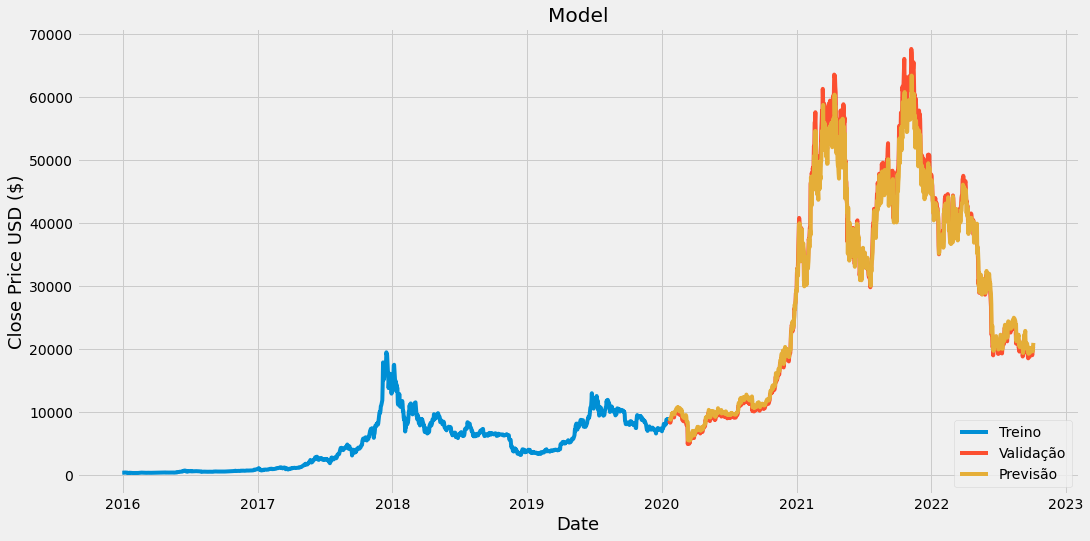

In [18]:
#plotar os dados
train = data[:training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions
#Visualizar os dados
plt.figure(figsize=(16,8))
plt.title ('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Treino', 'Validação','Previsão'], loc='lower right')
plt.show

In [19]:
#mostrar os preços válidos e previstos
valid

,Close,Predictions
Date,,
2020-01-22,8680.875977,9223.684570
2020-01-23,8406.515625,9150.538086
2020-01-24,8445.434570,8885.426758
2020-01-25,8367.847656,8944.753906
2020-01-26,8596.830078,8852.493164
...,...,...
2022-10-01,19312.095703,20001.685547
2022-10-02,19044.107422,19917.720703
2022-10-03,19623.580078,19654.966797


In [21]:
#Pegar a cotação
btc_quote = pdr.DataReader('BTC-USD')
#criar um novo dataframe
new_df = btc_quote.filter(['Close'])
#obter os valores do preço de fechamento dos últimos 60 dias e converter em array
last_60_days=new_df [-60:].values
#escalonar os dados para valores entre 0 e 1
last_60_days_scaled = scaler.transform (last_60_days)
#Criar uma lista de teste vazia
X_test = []
#anexar os últimos 60 dias
X_test.append(last_60_days_scaled)
#converter o conjunto de dados X_test para matriz numpy
X_test = np.array(X_test)
#remodelar os dados em terceira dimensão
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#obter o preço dimensionado previsto
pred_price= model.predict(X_test)
#inverter a escala
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 16ms/step
[[20650.584]]
